<a href="https://colab.research.google.com/github/Anna781421/Ribo-seq/blob/main/Ribo_seq_Python_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ Ribo-seq. Часть 1.1 - 1.3.

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats

%matplotlib inline

In [2]:
data = pd.read_csv('01. RiboSeq_RNASeq_HCC_counts.tsv', sep='\t', index_col='geneSymbol')
del data["geneID"]

In [3]:
#data.info()

In [4]:
data = data.fillna(0)
data['LC509-tumor-RNA'] = data['LC509-tumor-RNA'].astype(int)
data = data.drop_duplicates(keep='first')
data = data.loc[(data!=0).any(axis=1)]
data

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneSymbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857
TNMD,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
DPM1,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83
SCYL3,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176
C1orf112,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRBV7-2,6,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
RP1-34B20.21,0,0,1,39,0,0,0,5,0,0,...,0,31,0,6,0,62,0,0,1,17
RP11-511P7.5,0,4,27,5,0,32,20,51,0,6,...,81,52,1,0,9,42,0,10,3,40


In [5]:
RPF_cols = [col for col in data.columns if col.find('RPF')!=-1]
RNA_cols = [col for col in data.columns if col.find('RNA')!=-1]

In [6]:
RNA_col = np.array(data[RNA_cols])
RPF_col = np.array(data[RPF_cols])

Используем корреляцию Спирмена (учитывает не переметры а их относительную величину – ранг), т.к. корреляцию Пирсона можно корректно использовать только на нормированных данных.

In [7]:
corrs = []
for i in range(data.shape[0]): 
  corr, pval = sc.stats.spearmanr(RNA_col[i], RPF_col[i])
  corrs.append(corr)

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [8]:
data['spearmanr'] = np.array(corrs)
data.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,spearmanr
geneSymbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0,0,402,873,0,0,301,1627,0,0,...,457,0,0,200,889,0,0,161,857,NaN
TNMD,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,-0.139424
DPM1,168,239,88,187,114,439,66,201,325,117,...,170,109,357,60,244,141,173,56,83,0.849624
SCYL3,65,121,60,106,36,163,70,156,130,76,...,176,67,176,55,261,64,100,68,176,0.697779
C1orf112,8,43,18,70,16,76,4,63,44,14,...,437,7,167,34,201,6,61,9,58,0.811583


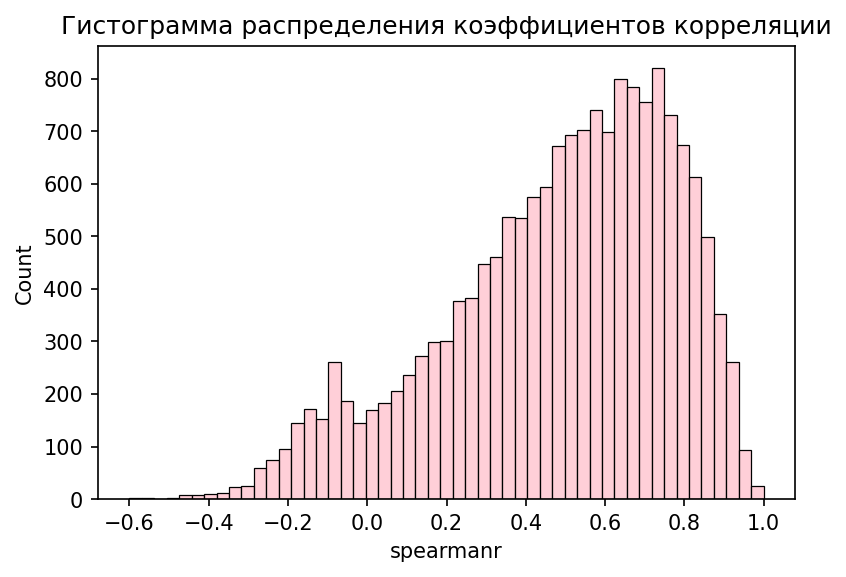

In [9]:
fig = plt.subplots(dpi=150, figsize=(6, 4))
plt.title('Гистограмма распределения коэффициентов корреляции')
sns.histplot(data['spearmanr'], color="pink")
plt.show()

# Топ 10 генов с самой высокой корреляцией

Выбирая гены с самой высокой корреляцией возникает проблема высокой корреляции у генов с низкой экспрессией. Чтобы получить хорошие результаты, убирем гены с нулевой экспрессией в образцах. 

In [10]:
max_corr_genes = np.array(data[data.sum(axis=1) > 10].sort_values(by='spearmanr', key=abs, ascending=False).index[0:10])
print(', '.join(max_corr_genes))

SCGB1D2, RFPL4B, PRG4, LGALS4, CYP7A1, HPR, HKDC1, FGB, C8A, ITIH3


# Топ 10 генов с самой низкой корреляцией

In [11]:
min_corr_genes = np.array(data[data.sum(axis=1) > 10].sort_values(by='spearmanr', key=abs).index[0:10])
print(', '.join(min_corr_genes))

TAS2R20, SUN2, PRELID3A, ZNF674, PRMT7, UBALD1, ANKHD1, GRIN1, POMC, HACD1


# Pаспределение каунтов Ribo-seq

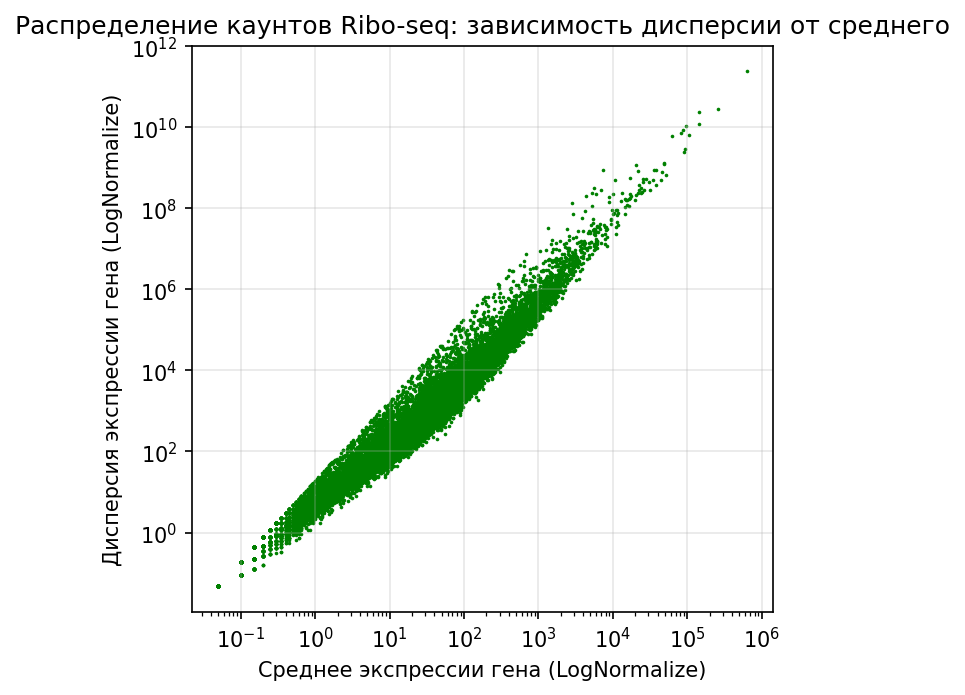

In [12]:
variance = np.var(RPF_col, axis=1)
mean = np.mean(RPF_col, axis=1)

mean = mean[variance > 0]
variance = variance[variance > 0]

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))

plt.title('Распределение каунтов Ribo-seq: зависимость дисперсии от среднего')
sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color="green", ax=ax)
ax.set_xlabel("Среднее экспрессии гена (LogNormalize)"); ax.set_ylabel("Дисперсия экспрессии гена (LogNormalize)")
ax.set_xscale("log")
ax.set_yscale("log")

ax.grid(alpha=0.3)

У всех генов дисперсия больше среднего, это похоже на NB-распределение.

# Подготовка данных для EDGR

In [13]:
data_EDGR = pd.read_csv('01. RiboSeq_RNASeq_HCC_counts.tsv', sep='\t', index_col='geneID')
data_EDGR = data_EDGR.fillna(0)
data_EDGR['LC509-tumor-RNA'] = data_EDGR['LC509-tumor-RNA'].astype(int)
del data_EDGR["geneSymbol"]
data_EDGR = data_EDGR.loc[(data_EDGR!=0).any(axis=1)]
data_EDGR

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857
ENSG00000000005.5,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
ENSG00000000419.12,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83
ENSG00000000457.13,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176
ENSG00000000460.16,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000282988.1,0,0,1,39,0,0,0,5,0,0,...,0,31,0,6,0,62,0,0,1,17
ENSG00000283013.1,0,4,27,5,0,32,20,51,0,6,...,81,52,1,0,9,42,0,10,3,40
ENSG00000283039.1,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data_EDGR.to_csv('RPF_RNA_data.tsv', sep='\t', header=True) # Объединенный файл для RNA-seq и Ribo-seq

In [15]:
RPF_RNA_mdata = pd.DataFrame(data=['normal','tumor'] * 20, index=data_EDGR.columns, columns = ['condition'])
RPF_RNA_mdata['method'] = (['RPF'] * 2 + ['RNA'] * 2) * 10
RPF_RNA_mdata.to_csv('RPF_RNA_mdata.tsv', sep='\t', header=True) # Файл с мета-датой для RNA-seq и Ribo-seq

In [16]:
RPF_data = pd.DataFrame(data=data_EDGR[RPF_cols], index=data_EDGR.index)
RPF_mdata = pd.DataFrame(data=['normal','tumor'] * 10, index=RPF_data.columns, columns = ['tissue']) 
RPF_mdata.to_csv('RPF_mdata.tsv', sep='\t', header=True) # Файл с мета-датой для Ribo-seq
RPF_data.to_csv('RPF_data.tsv', sep='\t', header=True) # Файл с данными для Ribo-seq

In [17]:
RNA_data = pd.DataFrame(data=data_EDGR[RNA_cols], index=data_EDGR.index)
RNA_mdata = pd.DataFrame(data=['normal', 'tumor'] * 10, index=RNA_data.columns, columns = ['tissue'])
RNA_mdata.to_csv('RNA_mdata.tsv', sep='\t', header=True) # Файл с мета-датой для RNA-seq
RNA_data.to_csv('RNA_data.tsv', sep='\t', header=True) # Файл с данными для RNA-seq

In [18]:
RPF_RNA_mdata.head(2)

,condition,method
LC001-normal-RPF,normal,RPF
LC001-tumor-RPF,tumor,RPF


In [19]:
RPF_data.head(2)

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000005.5,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0


In [20]:
RPF_mdata.head(2)

,tissue
LC001-normal-RPF,normal
LC001-tumor-RPF,tumor


In [21]:
RNA_data.head(2)

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,402,873,301,1627,258,65,226,353,208,399,153,361,157,333,218,457,200,889,161,857
ENSG00000000005.5,0,1,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0


In [22]:
RNA_mdata.head(2)

,tissue
LC001-normal-RNA,normal
LC001-tumor-RNA,tumor
